In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from numpy.random import default_rng
rng = default_rng()

## HW_04 - Exercise: failure prediction

In the [dropping keys experiment](./drop_keys.ipynb), we ended the trials when the virtual person _succeeded_ in entering the room. What would this look like if an engineering process _failed_ when a certain device is used?

Consider a manufacturing plant that produces uses O-rings in the assembly. The O-rings are the weakest link in the design. Your company needs to use 10 O-rings in every device you manufacture. If one O-ring fails, the whole device fails. Your quality control team knows the O-rings fail 1-out-of-10 times. When you test a device, if it fails the rings are discarded and ten more used to assemble the device.

Your manager wants you to come up with a process to assemble these parts. The manager thinks that each part will need to be reassembled 10% of the time, regardless of the number of times its failed. See if you can recommend a process that makes use of this new knowledge that repeated assemblies have a decreased chance of failure.



(array([  0., 978., 935., 786., 746., 645., 589., 499., 484., 405., 392.,
        345., 308., 277., 241., 229., 221., 166., 183., 160., 142., 118.,
        120.,  94.,  92.,  92.,  74.,  54.,  60.,  67.,  51.,  40.,  44.,
         34.,  36.,  25.,  33.,  30.,  22.,  20.,   8.,  14.,  15.,  13.,
         13.,  10.,  10.,   7.,   6.,   2.,   4.,   5.,   3.,   5.,   3.,
          6.,   5.,   1.,   1.,   4.,   4.,   5.,   3.,   3.,   1.,   0.,
          0.,   2.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   2.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 6

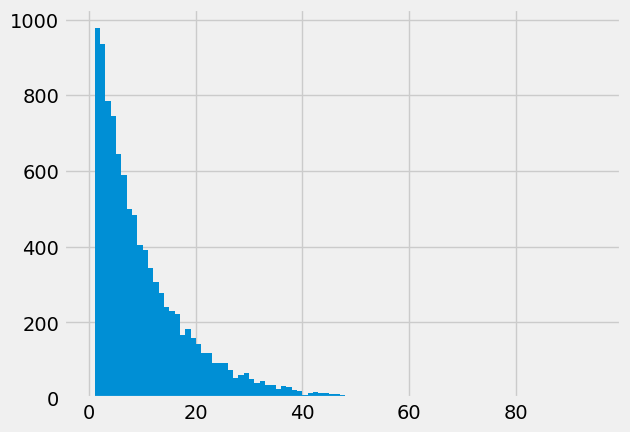

In [17]:
N = 10000
cases = np.zeros(N)
keys = np.arange(10)
for ncase in range(N):
    tries = 0
    key = 10
    while key != 0:
        key = rng.integers(len(keys), size = 1)
        tries += 1
    cases[ncase] = tries
plt.hist(cases, bins = np.arange(np.max(cases)))

In [4]:
try_01 = np.sum(cases == 1)/N
try_02 = np.sum(cases == 2)/N
try_03 = np.sum(cases == 3)/N
try_04 = np.sum(cases == 4)/N

print('failure on try 1: {}, {:1.2f}%'.format(try_01*N, 100*try_01))

print('failure on try 2: {}, {:1.2f}%'.format(try_02*N, 100*try_02))

print('failure on try 3: {}, {:1.2f}%'.format(try_03*N, 100*try_03))

print('failure on try 4: {}, {:1.2f}%'.format(try_04*N, 100*try_04))


failure on try 1: 1035.0, 10.35%
failure on try 2: 875.0, 8.75%
failure on try 3: 854.0, 8.54%
failure on try 4: 669.0, 6.69%


In [5]:
1/10*9/10*9/10*9/10

0.07289999999999999

My first thought when given this problem is to test individual o-rings with some sort of o-ring test rather than testing a while assembly and having to take the entire thing apart and discard all the rings if only one had failed. Although this doesn't relate to the procedure and monte carlo analysis outlined above, it would be an efficient way of testing each of these rings while minimizing the need for discarding rings that work effectively.

For a specific testing process, you could create a batch of assemblies and do multiple tests at a time to minimize the downtime and allow for tests that fail quickly to be reassembled for a future analysis. Keeping track of how many times each individual assembly is reassembled could also be effective as after around 20-30 reassembles it is more and more unlikely that an error is to occur. Potentially checking the actual assembly itself rather than assuming the orings are the problem may prove effective since almost 90% of tests are completed between 1-20 reassembles and ~95% of assemblies are completed between 1-30 attempts.

To minimize the amount of materials wasted try and add some sort of process that can track which o rings fail and which work as expected. If it can not be done to account for a specific oring working try and narrow it down to 2-3 o rings that failed to allow for the ones that worked to be reused and so it doesn't have to be fully disassembled.

Potentially see if you could have the supplier give orings that are able to pass the testing a higher percentage of the time. If not, picking a new supplier could save more time, money, and materials.

Rerunning this test with seeing how changing only 5/10 rings could prove to be useful to see how the assemblies compare. This could mean that it could take an extra test half the time but the other half it would save half of the orings that work if it was to work instead of fail.